In [9]:
import time
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from utils.bst import BST

## Measuring insert time, random data, AVL vs BST

In [29]:
np.random.seed(0)
N_DATA = 1_000_000
rand_data = np.random.randint(-100000, 100000, (N_DATA, ))
ordered_data = np.arange(0, N_DATA)
slices = [5, 10, 50, 100, 500, 1_000, 5_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000]
times_insert_avl = {s: [] for s in slices}
times_insert_bst = {s: [] for s in slices}
times_insert_bst_worst = {s: [] for s in slices}

avl = BST(avl=True)
t = time.time()
for idx, d in enumerate(rand_data):
    avl.insert(d)
    if (idx + 1) in slices:
        times_insert_avl[(idx + 1)].append(time.time() - t)

bst = BST(avl=False)
t = time.time()
for idx, d in enumerate(rand_data):
    bst.insert(d)
    if (idx + 1) in slices:
        times_insert_bst[(idx + 1)].append(time.time() - t)

# bst_worst = BST(avl=False)
# t = time.time()
# for idx, d in enumerate(ordered_data):
#     bst_worst.insert(d)
#     if (idx + 1) in slices:
#         times_insert_bst_worst[(idx + 1)].append(time.time() - t)


/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


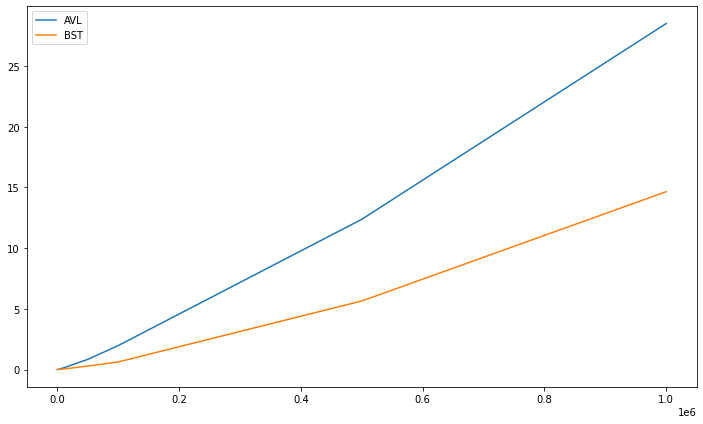

In [30]:
f, ax = plt.subplots(figsize=(12, 7))
# ax.set(xscale='log', yscale='log')
sb.lineplot([k for k in times_insert_avl.keys()], [np.mean(v) for v in times_insert_avl.values()], ax=ax, legend='brief', label='AVL')
sb.lineplot([k for k in times_insert_bst.keys()], [np.mean(v) for v in times_insert_bst.values()], ax=ax, legend='brief', label='BST')
# sb.lineplot([k for k in times_insert_bst_worst.keys()], [np.mean(v) for v in times_insert_bst_worst.values()], ax=ax)

## Height AVL vs BST

In [31]:
print(f'AVL height: {avl.get_tree_height()}')
print(f'BST height: {bst.get_tree_height()}')
# print(bst_worst.get_tree_height())
print(f'Least possible h: {np.log2(N_DATA)}')

AVL height: 26
BST height: 55
Least possible h: 19.931568569324174


## Measuring search time, AVL vs BST

In [32]:
times_search_avl = {s: [] for s in slices}
times_search_bst = {s: [] for s in slices}
# times_search_bst_worst = {s: [] for s in slices}

t = time.time()
for idx, d in enumerate(rand_data):
    avl.find(d)
    if (idx + 1) in slices:
        times_search_avl[(idx + 1)].append(time.time() - t)


t = time.time()
for idx, d in enumerate(rand_data):
    bst.find(d)
    if (idx + 1) in slices:
        times_search_bst[(idx + 1)].append(time.time() - t)

/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


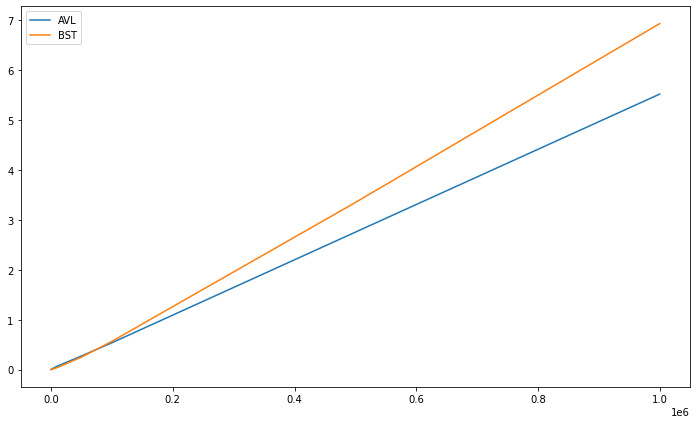

In [33]:
f, ax = plt.subplots(figsize=(12, 7))
# ax.set(xscale='log', yscale='log')
sb.lineplot([k for k in times_search_avl.keys()], [np.mean(v) for v in times_search_avl.values()], ax=ax, legend='brief', label='AVL')
sb.lineplot([k for k in times_search_bst.keys()], [np.mean(v) for v in times_search_bst.values()], ax=ax, legend='brief', label='BST')

## Measuring delete time, AVL vs BST

In [34]:
times_delete_avl = {s: [] for s in slices}
times_delete_bst = {s: [] for s in slices}
# times_search_bst_worst = {s: [] for s in slices}

t = time.time()
for idx, d in enumerate(rand_data):
    avl.delete(d)
    if (idx + 1) in slices:
        times_delete_avl[(idx + 1)].append(time.time() - t)


t = time.time()
for idx, d in enumerate(rand_data):
    bst.delete(d)
    if (idx + 1) in slices:
        times_delete_bst[(idx + 1)].append(time.time() - t)

/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yehor/envs/p38/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


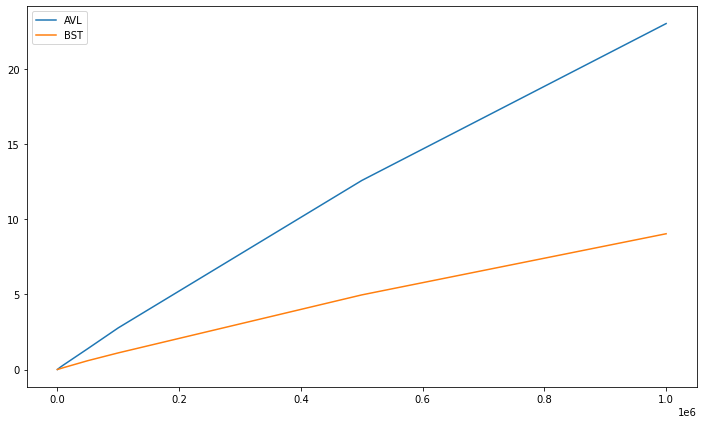

In [35]:
f, ax = plt.subplots(figsize=(12, 7))
# ax.set(xscale='log', yscale='log')
sb.lineplot([k for k in times_delete_avl.keys()], [np.mean(v) for v in times_delete_avl.values()], ax=ax, legend='brief', label='AVL')
sb.lineplot([k for k in times_delete_bst.keys()], [np.mean(v) for v in times_delete_bst.values()], ax=ax, legend='brief', label='BST')